In [9]:
'''
tensorflow2.x执行流程（及时执行模式）
'''
import tensorflow as tf

a = tf.Variable([[1, 2], [3, 4]])
b = tf.Variable([[1], [2]])
print(a.numpy(), '\n-----------------------\n', b.numpy())
c = tf.matmul(a, b)
print(c.numpy())


[[1 2]
 [3 4]] 
-----------------------
 [[1]
 [2]]
[[ 5]
 [11]]


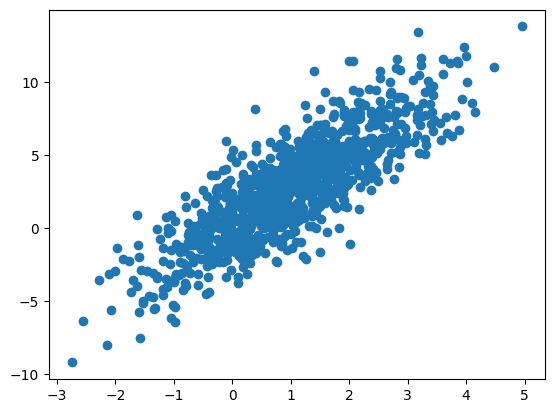

       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

SSLError: [SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:2580)

In [21]:
'''
tensorflow实现回归任务
'''
import tensorflow as tf
import matplotlib.pyplot as plt

#构造数据
num_points = 1000
x = []
y = []
for i in range(num_points):
    x_i = tf.random.normal([1], mean=1, stddev=1.2, seed=123).numpy()
    y_i = 2.5 * x_i + 0.2 + tf.random.normal([1], mean=0.05, stddev=2, seed=40).numpy()
    x.append(x_i)
    y.append(y_i)

plt.scatter(x, y)
plt.show()
#构建线性回归模型
model=tf.keras.sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation=None) # 单神经元，无激活函数
])
#编译模型（定义优化器和损失函数）
# model.compile()

